<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

# AdaBoost Classification with Normalize

This Code template is for the Classification tasks using a simple AdaBoostClassifier based on the Boosting Ensemble Learning technique, where the data rescaling technique used is the Normalize function from the sci-kit learn library.

### Required Packages

In [ ]:
!pip install imblearn

In [ ]:
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as se 
import matplotlib.pyplot as plt 
from sklearn.ensemble import AdaBoostClassifier 
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder,Normalizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, plot_confusion_matrix
warnings.filterwarnings('ignore')

### Initialization

Filepath of CSV file

In [3]:
#filepath
file_path= ""

List of features which are  required for model training .

In [4]:
#x_values
features = []

Target feature for prediction.

In [5]:
#y_value
target = ''

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [6]:
df=pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [7]:
X = df[features]
Y = df[target]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [8]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

In [9]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1


#### Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

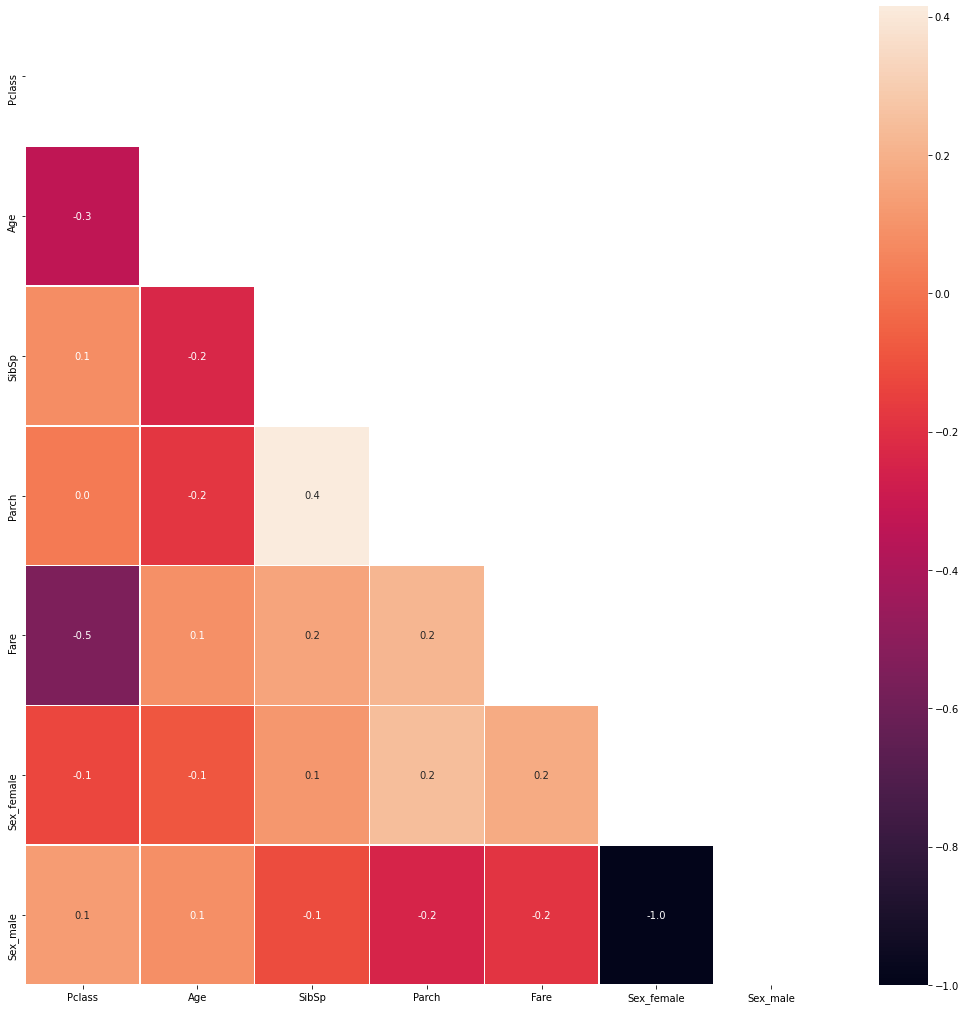

In [10]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

#### Distribution Of Target Variable

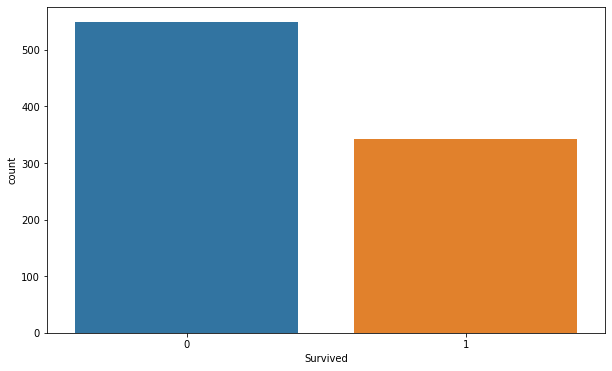

In [11]:
plt.figure(figsize = (10,6))
se.countplot(Y)

### Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

#### Handling Target Imbalance

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class.We will perform overspampling using imblearn library. 

In [13]:
X_train,y_train = RandomOverSampler(random_state=123).fit_resample(X_train, y_train)


####  Data Rescaling

Normalizer normalizes samples (rows) individually to unit norm.

Each sample with at least one non zero component is rescaled independently of other samples so that its norm (l1, l2 or inf) equals one.

We will fit an object of Normalizer to train data then transform the same data via fit_transform(X_train) method, following which we will transform test data via transform(X_test) method.


In [14]:
normalizer = Normalizer()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

### Model

AdaBoost is one of the initial boosting ensemble algorithms to be adapted in solving studies. It helps by combine multiple â€œweak classifiersâ€ into a single â€œstrong classifier.â€ The core concept of the algorithm is to fit a sequence of weak learners on repeatedly modified versions of the data. The predictions from all the Weak learners are then combined through a weighted majority vote or sum to produce the outcome/Prediction. The data modifications at each iteration consist of applying weights to each of the training samples. Initially, those weights are all set so that the first iteration only trains a weak learner on the original data. For every successive iteration, the sample weights are individually modified, and the algorithm is reapplied to the reweighted data. At a given iteration, those training examples which get incorrectly classified by the model at the previous iteration have their weights increased. Whereas the weight gets decreased for data that has been predicted accurately.As iterations continue, data that are difficult to predict or incorrectly classified receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the data that are missed by the previous ones in the sequence

#### Tuning Parameters

    1. base_estimator: object, default=None
>The base estimator from which the boosted ensemble is built. Support for sample weighting is required, as well as proper classes_ and n_classes_ attributes. If None, then the base estimator is DecisionTreeClassifier initialized with max_depth=1.

    2. n_estimators: int, default=50
>The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.

    3. learning_rate: float, default=1.
>Learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators.

    4. algorithm: {â€˜SAMMEâ€™, â€˜SAMME.Râ€™}, default=â€™SAMME.Râ€™
>If â€˜SAMME.Râ€™ then use the SAMME.R real boosting algorithm. base_estimator must support calculation of class probabilities. If â€˜SAMMEâ€™ then use the SAMME discrete boosting algorithm. The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.

#### Note:
>For better performance of the Adaboost model, the base estimator (Decision Tree Model) can be fine-tuned.


In [15]:
# Build Model here
model = AdaBoostClassifier(random_state=123)
model.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)

#### Model Accuracy

score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [16]:
print("Accuracy score {:.2f} %\n".format(model.score(X_test,y_test)*100))

Accuracy score 76.54 %



#### Confusion Matrix

A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

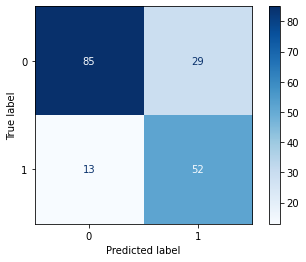

In [17]:
plot_confusion_matrix(model,X_test,y_test,cmap=plt.cm.Blues)

#### Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

* **where**:
    - Precision:- Accuracy of positive predictions.
    - Recall:- Fraction of positives that were correctly identified.
    - f1-score:-  percent of positive predictions were correct
    - support:- Support is the number of actual occurrences of the class in the specified dataset.

In [18]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.75      0.80       114
           1       0.64      0.80      0.71        65

    accuracy                           0.77       179
   macro avg       0.75      0.77      0.76       179
weighted avg       0.79      0.77      0.77       179



#### Feature Importances.

The Feature importance refers to techniques that assign a score to features based on how useful they are for making the prediction.

(-1.0, 7.0)

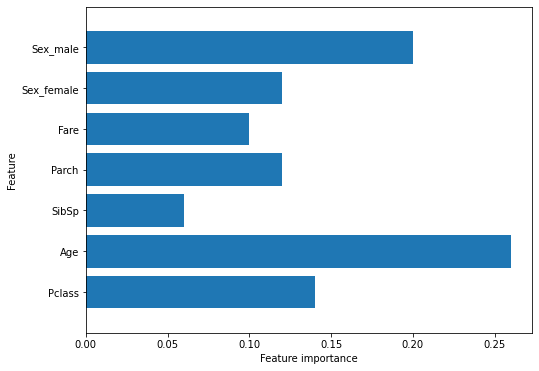

In [19]:
plt.figure(figsize=(8,6))
n_features = len(X.columns)
plt.barh(range(n_features), model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)

#### Creator: Arpit Somani , Github: [Profile](https://github.com/arpitsomani8)